In [1]:
import os
from dotenv import load_dotenv
from pymongo import MongoClient
from MongoDBDataset import create_dataset, features_and_labels
import matplotlib.pyplot as plt
import tensorflow as tf

load_dotenv()
%matplotlib inline

In [2]:
client = MongoClient(os.environ["URI"])
db = client.flowers
N_CLASSES = len(db.test.distinct("category"))

In [3]:
# collection=db.test

# for mongodb_document in collection.find({}).sort("_id", ):
#     label = mongodb_document["flower_type"]
#     # features = Image.open(io.BytesIO(mongodb_document["data"]))
#     print(label)

In [12]:
train_dataset = create_dataset(db.train, batch_size=3, mode="train")
eval_dataset = create_dataset(db.test, batch_size=1, mode="test")

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


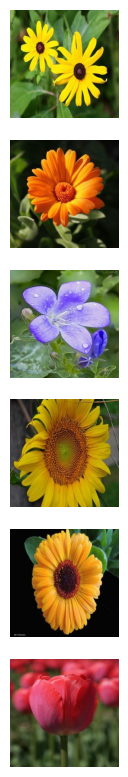

In [13]:
n_plots = 5*3
fig = plt.figure(figsize=(25,25))

for n_image, (data, label) in enumerate(train_dataset.take(2), start=1):
    for i in range(3):
        print(tf.reduce_min(data[i]))
        fig.add_subplot(n_plots, 1, (n_image-1)*3+i+1)
        plt.imshow(data[i].numpy().astype(int).squeeze())
        plt.axis("off")

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


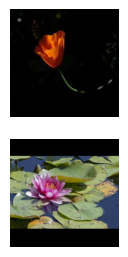

In [7]:
n_plots = 5 * 3
fig = plt.figure(figsize=(25, 25))

for n_image, (data, label) in enumerate(eval_dataset.take(2), start=1):
    print(tf.reduce_min(data))
    fig.add_subplot(n_plots, 1, n_image)
    plt.imshow(data.numpy().astype(int).squeeze())
    plt.axis("off")

In [ ]:
client.close()